In [15]:
#Plotting 
%matplotlib inline
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set(style="whitegrid")

#Base Classes stuff
from FileSystemTools import *
from UtilityDecorators import *
from UtilityFunctions import *

import pandas as pd
from pandas import DataFrame, Series
import numpy as np

BASE = getSystemRoot()
electionFolder = "%s/Box Sync/Faculty Senate Collaborative Documents/Elections" % BASE
electionReturnsFilePath = "%s/Election returns.xlsx" % BASE

In [2]:
generalData = pd.read_excel(electionReturnsFilePath, sheet_name='Data-general')
generalData.set_index('Year', inplace=True)
generalEligible = generalData['Eligible']
generalData.drop(columns=['Final', 'Eligible', '%Eligible'], inplace=True)
generalData.dropna(axis=1, how='all', inplace=True)

senateData = pd.read_excel(electionReturnsFilePath, sheet_name='Data-senate')
senateData.set_index('Year', inplace=True)
senateEligible = senateData['Eligible']
senateData.drop(columns=['Final', 'Eligible', '%Eligible'], inplace=True)
senateData.dropna(axis=1, how='all', inplace=True)


def calc_proport_of_eligible(frame, year, total):
    numEligible = frame.loc[year]
    return total / numEligible

generalProport = generalData.apply(lambda x : calc_proport_of_eligible(generalEligible, x.index, x))
senateProport =  senateData.apply(lambda x : calc_proport_of_eligible(senateEligible, x.index, x))

# General election

## Total votes cast

In [3]:
generalData

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14
Year,,,,,,,,,,,,,,
2012,101,143,178,204,209,213,213,219,221,244,279,279.0,286.0,290.0
2013,117,134,141,146,148,213,234,234,241,241,245,245.0,245.0,245.0
2014,101,154,162,248,278,292,295,296,328,339,378,378.0,378.0,378.0
2015,119,156,162,169,242,263,271,276,325,335,338,338.0,338.0,338.0
2016,208,282,298,308,393,403,444,458,462,488,498,498.0,498.0,498.0
2017,187,223,228,295,301,305,308,309,309,354,359,359.0,359.0,359.0
2018,159,223,274,305,347,359,397,440,477,499,542,NaN,NaN,NaN


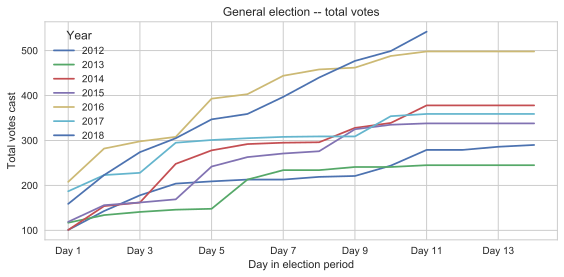

In [4]:
fig, axes = plt.subplots(figsize=(8,4))
generalData.T.plot(ax=axes)
axes.set_title("General election -- total votes")
axes.set_ylabel("Total votes cast"); axes.set_xlabel("Day in election period")
fig.tight_layout()

## Proportion of eligible voters

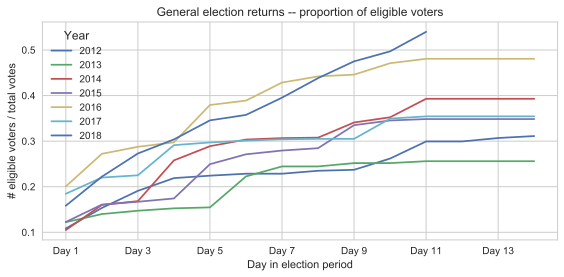

In [5]:
fig, axes = plt.subplots(figsize=(8,4))
generalProport.T.plot(ax=axes)
axes.set_title("General election returns -- proportion of eligible voters")
axes.set_ylabel("# eligible voters / total votes"); axes.set_xlabel("Day in election period")
fig.tight_layout()

## Daily marginal votes cast

In [6]:
generalMarginal = generalData.T.sub(generalData.T.shift(1), axis='columns').T.drop('Day 1', axis=1)
generalMarginal

,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14
Year,,,,,,,,,,,,,
2012,42.0,35.0,26.0,5.0,4.0,0.0,6.0,2.0,23.0,35.0,0.0,7.0,4.0
2013,17.0,7.0,5.0,2.0,65.0,21.0,0.0,7.0,0.0,4.0,0.0,0.0,0.0
2014,53.0,8.0,86.0,30.0,14.0,3.0,1.0,32.0,11.0,39.0,0.0,0.0,0.0
2015,37.0,6.0,7.0,73.0,21.0,8.0,5.0,49.0,10.0,3.0,0.0,0.0,0.0
2016,74.0,16.0,10.0,85.0,10.0,41.0,14.0,4.0,26.0,10.0,0.0,0.0,0.0
2017,36.0,5.0,67.0,6.0,4.0,3.0,1.0,0.0,45.0,5.0,0.0,0.0,0.0
2018,64.0,51.0,31.0,42.0,12.0,38.0,43.0,37.0,22.0,43.0,NaN,NaN,NaN


/Users/adam/.pyenv/versions/3.4.3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


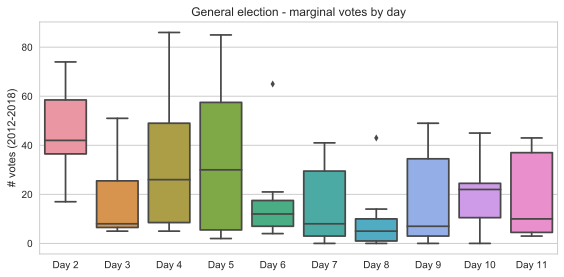

In [7]:
fig, axes = plt.subplots(figsize=(8,4))
sns.boxplot(data=generalMarginal.dropna(axis=1), ax=axes)
axes.set_title("General election - marginal votes by day")
axes.set_ylabel("# votes (%s-%s)" % (generalMarginal.index.min(), generalMarginal.index.max()))
fig.tight_layout()

# Senate-elected positions election 

## Total votes cast

In [8]:
senateData

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11
Year,,,,,,,,,,,
2015,17,21,23,24,35,36,36,38,40,41,41
2016,23,31,33,35,40,43,46,47,48,51,52
2017,20,25,26,35,35,37,37,37,37,43,45
2018,13,20,24,28,31,33,34,38,39,41,50


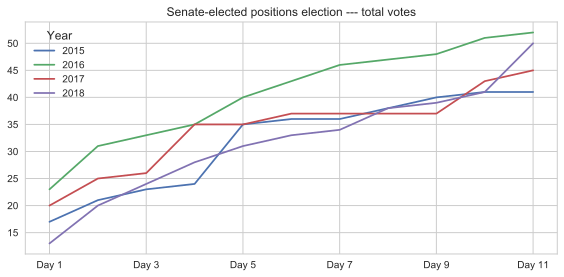

In [9]:
fig, axes = plt.subplots(figsize=(8,4))
senateData.T.plot(ax=axes)
axes.set_title("Senate-elected positions election --- total votes")
fig.tight_layout()

## Proportion of eligible voters

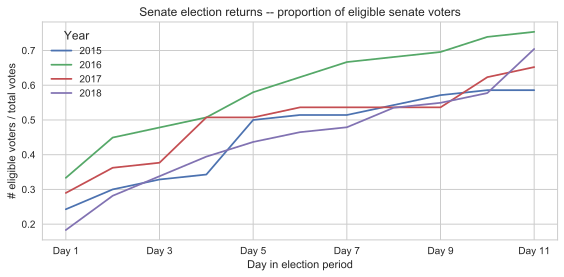

In [10]:
fig, axes = plt.subplots(figsize=(8,4))
senateProport.T.plot(ax=axes)
axes.set_title("Senate election returns -- proportion of eligible senate voters")
axes.set_ylabel("# eligible voters / total votes"); axes.set_xlabel("Day in election period")
fig.tight_layout()

## Votes cast per day

In [11]:
senateMarginal = senateData.T.sub(senateData.T.shift(1), axis='columns').T.drop('Day 1', axis=1)
senateMarginal

,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11
Year,,,,,,,,,,
2015,4.0,2.0,1.0,11.0,1.0,0.0,2.0,2.0,1.0,0.0
2016,8.0,2.0,2.0,5.0,3.0,3.0,1.0,1.0,3.0,1.0
2017,5.0,1.0,9.0,0.0,2.0,0.0,0.0,0.0,6.0,2.0
2018,7.0,4.0,4.0,3.0,2.0,1.0,4.0,1.0,2.0,9.0


/Users/adam/.pyenv/versions/3.4.3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


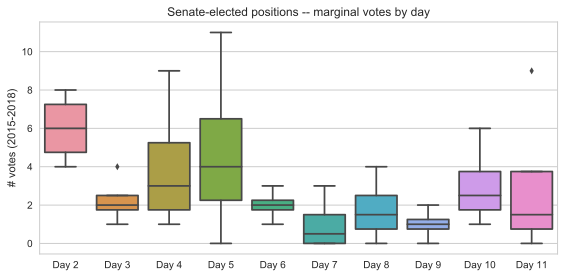

In [12]:
fig, axes = plt.subplots(figsize=(8,4))
sns.boxplot(data=senateMarginal.dropna(axis=1), ax=axes)
axes.set_title("Senate-elected positions -- marginal votes by day")
axes.set_ylabel("# votes (%s-%s)" % (senateMarginal.index.min(), senateMarginal.index.max()))
fig.tight_layout()

# Election results computation

In [ ]:
#Generic system tools
import re, pprint, sys, json, os, shutil, webbrowser

import pandas as pd

#Base Classes stuff
# from FileSystemTools import *
# from UtilityDecorators import *
# from UtilityFunctions import *


%cd "/Users/adam/Dropbox/csun-election-management"
%run -i environment

# Load the data from the csv file into a dataframe
data = load_results_into_frame(INPUT_FOLDER_PATH)
# Give each row an id (also saves copy of the modified file for audits)
add_rowIds(data, FILE_W_ROW_IDS_PATH)

%cd "/Users/adam/Dropbox/csun-election-management/counter/src/"
from DataObjects import * 
%cd "/Users/adam/Dropbox/csun-election-management/Input/Election-definitions"

import csv

def read_csv_mapping(csvFile, firstColIsKey=True):
    """Returns a dictionary mapping values in the first column to values in the second. That way
     the second column list of tuples for each row of the stored item

    Args:
        firstColIsKey (oboolean): Whether the first column in the file is to be used as keys
    """
    with open(csvFile) as csvFile:
        reader = csv.reader(csvFile, quotechar='|')
        out = {}
        for row in reader:
            if firstColIsKey:
                out[row[0]] =  row[1]
            else:
                out[row[1]] = row[0]
        return out


read_csv_mapping('Office2.csv')

import pandas as pd

data


make_election_obj_from_file('Office2.xlsx')

d = pd.read_excel('Office2.xlsx')
d.columns

fieldNames = ['953897: Choose 2 (ONLY 2) of the following:', '955923: Choose 4 (ONLY 4) of the following:']

%cd "/Users/adam/Dropbox/csun-election-management"
%run -i click_to_tabulate_votes

# considering removing dependency on pandas
import csv
def read_csv(csvFile):
    """Returns a list of tuples for each row of the stored item"""
    with open(csvFile) as csvFile:
        reader = csv.reader(csvFile, quotechar='|')
        out = []
        for row in reader:
            out.append(tuple(row))
        return out

fileList = makeDataFileList(INPUT_FOLDER_PATH)
d = read_csv(fileList[0])
d

#extract valid names for test use
names = []
for n in fieldNames:
    ns = []
    for r in data[n]:
        ns += ResultFieldProcessor.process_field_values(r)
    ns = list(set(ns))
    names.append(ns)
        
print (names)
    

# create elections
election1 = OfficeElection('office1', '953897: Choose 2 (ONLY 2) of the following:', names[0], 2 )
election2 = OfficeElection('office1', '955923: Choose 4 (ONLY 4) of the following:', names[1], 4 )

vc1 = VoteCounter(election1)
vc1.count(data)

vc2 = VoteCounter(election2)
vc2.count(data)

# Give each row a unique identifier


# Save the file with a new, timestamped identifier


# Strip out any identifying data


# Save again with new id

# Load list of relevant columns

# Create candidate count dict

# Separate each field into a list

# Validate names (we don't want a wierd string to throw things off )

# If more than 4 valid names, store in log and throw exception

# If 0-4 valid names, add to the count


from pandas import Series, DataFrame


vc2.getResults()

v = Series(vc2.resultsDict)

v.plot(kind='bar')

# Developing test data

In [13]:
        testNames = ['smith, john (bio)', 'sanchez, jill (chem)']
        maxValid = 2
        election = DO.OfficeElection('office1', 'field name', testNames, maxValid)
        vc = P.VoteCounter(election)
        testFrame = DataFrame([{ testNames[0] : testNames[0]}])
        # call


NameError: name 'DO' is not defined

In [ ]:
from faker import Faker
fake = Faker()

def make_candidate():
    dept = "%s %s %s" % (fake.word(), fake.word(), fake.word())
    return "%s, %s (%s)" % (fake.last_name(), fake.first_name(), dept)



In [ ]:
NUMBER_VOTERS = 3
NUMBER_CANDIDATES = 3
NUMBER_INVALID = 0

FIELD_NAME = fake.bs()

In [ ]:
d = {'j':8}
setattr(d, 'j', 9)
d

In [ ]:
def make_vote_string(candidates):
    """Creates the record we are expecting to find in the canvas export"""
    if type(candidates) is str: 
        candidates = [ candidates ]
    r = ""
    for c in candidates:
        r = "%s,%s" % (r, c)
    # slice before return to remove an initial comma
    return r[1:]

make_vote_string('')

In [ ]:
b = [1, 2]
b + b

In [ ]:
candidates = [make_candidate() for i in range(0, NUMBER_CANDIDATES )]

In [ ]:
# All valid; 1 vote for each candidate
DataFrame([ { FIELD_NAME : c } for c in candidates])

In [ ]:
# All vote for all candidates
f = []
for i in range(0, NUMBER_VOTERS):
    r = ""
    for c in candidates:
        r = "%s,%s" % (r, c)
    f.append({ FIELD_NAME : r[1:] }) # there will be an initial comma otherwise
DataFrame(f)

In [ ]:
# 1 abstains

In [ ]:
candidates

In [ ]:
import faker

In [ ]:
a = faker.Factory()

In [ ]:
a.create()

In [30]:
j = DataFrame([{'a' : 1, 'b':4}, {'a' : 5, 'b':46}])


In [35]:
j.sort_values(by='a', ascending=False)

,a,b
1,5,46
0,1,4


In [37]:
j.drop(['a'], axis=1)

,b
0,4
1,46


In [39]:
k = 'a b c '
k = k.strip()
k

'a b c'

In [17]:



d = pd.read_csv("%s/Senate Election - Spring 2018 Survey Student Analysis Report.csv" % electionFolder)

In [25]:
for idx, row in d.iterrows():
    print(pd.isna(row[7]), row[7])

False Jordan Eickman (Deaf Studies),Christina Mayberry (Library),Dan Weingarten (Theatre)
False Jordan Eickman (Deaf Studies),Beth Lasky (Special Education),Cheryl Spector (English)
False Beth Lasky (Special Education),Christina Mayberry (Library),Hillary Miller (Theatre)
False Jordan Eickman (Deaf Studies),Christina Mayberry (Library),Cheryl Spector (English)
False Jordan Eickman (Deaf Studies),Christina Mayberry (Library),Cheryl Spector (English)
True nan
False Hillary Miller (Theatre),Quinn Saunders (Cinema & Television Arts),Dan Weingarten (Theatre)
False David Boyajian (Civil Engineering & Construction Management),Christina Mayberry (Library),Cheryl Spector (English)
False Beth Lasky (Special Education),Christina Mayberry (Library),Cheryl Spector (English)
False Beth Lasky (Special Education),Christina Mayberry (Library),Quinn Saunders (Cinema & Television Arts)
False Hillary Miller (Theatre),Quinn Saunders (Cinema & Television Arts),Cheryl Spector (English)
False Jordan Eickman (